<a href="https://colab.research.google.com/github/jfonsecav/physics-tools/blob/main/Nuclear_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller Introducción a la Física Subatómica
##Johan Esteban Fonseca Vega - Yuber Andrés Alvarez Aldana

## PUNTO 1

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.special import hermite, factorial, erfc

def psi_squared(n, xi):
    Hn = hermite(n)               # Polinomio de Hermite H_n(x)
    norm = 1 / (np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)))
    return (norm**2) * (Hn(xi))**2 * np.exp(-xi**2)

def probability_outside_classical(n):
    xi_cl = np.sqrt(2 * n + 1)
    integral, error = quad(lambda xi: psi_squared(n, xi), xi_cl, np.inf)
    return 2 * integral  # Doble porque es simétrico

# Calcular y mostrar resultados para n = 0, 1, 2
for n in range(3):
    P_out = probability_outside_classical(n)
    print(f"n = {n} | P_out = {P_out:.6f} ({P_out * 100:.2f}%)")

# Comparación con erfc para n = 0
print(f"\n[Check] erfc(1) = {erfc(1):.6f}")


n = 0 | P_out = 0.157299 (15.73%)
n = 1 | P_out = 0.111610 (11.16%)
n = 2 | P_out = 0.095069 (9.51%)

[Check] erfc(1) = 0.157299


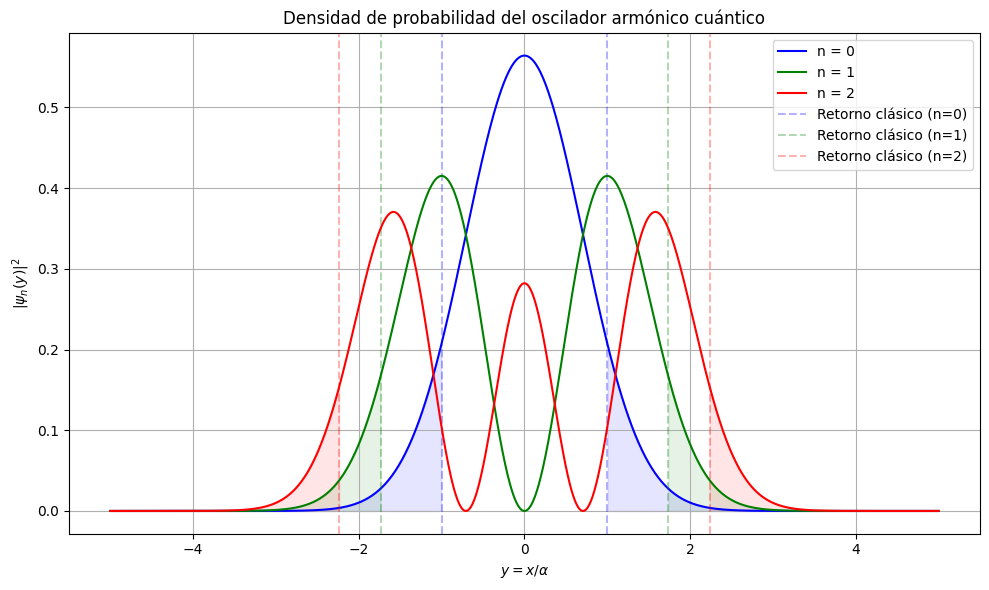

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite, factorial
from matplotlib.lines import Line2D

# Densidad de probabilidad para el oscilador armónico
def psi_squared(n, xi):
    Hn = hermite(n)
    norm = 1 / (np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)))
    return (norm**2) * (Hn(xi))**2 * np.exp(-xi**2)

# Valores de xi
xi_vals = np.linspace(-5, 5, 1000)

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar para n = 0, 1, 2
colors = ['blue', 'green', 'red']
for n, color in zip(range(3), colors):
    psi2 = psi_squared(n, xi_vals)
    xi_cl = np.sqrt(2 * n + 1)

    # Densidad de probabilidad
    plt.plot(xi_vals, psi2, label=f'n = {n}', color=color)

    # Región clásica (sombreada)
    plt.axvline(x=xi_cl, color=color, linestyle='--', alpha=0.3)
    plt.axvline(x=-xi_cl, color=color, linestyle='--', alpha=0.3)
    plt.fill_between(xi_vals, psi2, where=(xi_vals > xi_cl), color=color, alpha=0.1)
    plt.fill_between(xi_vals, psi2, where=(xi_vals < -xi_cl), color=color, alpha=0.1)

# Configuración del gráfico
plt.title("Densidad de probabilidad del oscilador armónico cuántico")
plt.xlabel(r'$y = x/\alpha $')
plt.ylabel(r'$|\psi_n(y)|^2$')

# Crear elementos personalizados para la leyenda
custom_lines = [
    Line2D([0], [0], color='blue', linestyle='--', alpha=0.3, label='Retorno clásico (n=0)'),
    Line2D([0], [0], color='green', linestyle='--', alpha=0.3, label='Retorno clásico (n=1)'),
    Line2D([0], [0], color='red', linestyle='--', alpha=0.3, label='Retorno clásico (n=2)')
]

plt.legend()

plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + custom_lines)

plt.grid(True)
plt.tight_layout()
plt.show()


# PUNTO 4:


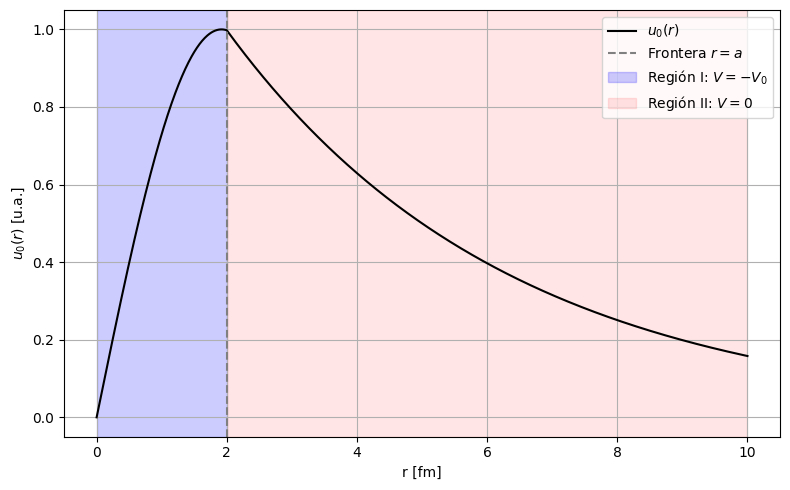

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
hbar2_2mu = 41.47  # MeV·fm²
V0 = 30            # MeV
a = 2              # fm
E = -2.2           # MeV

# Cálculo de k_i y k_ii
k_i = np.sqrt((E + V0) / hbar2_2mu)
k_ii = np.sqrt(-E / hbar2_2mu)

# Constantes A y B para garantizar continuidad
A = 1.0  # Valor arbitrario (la normalización no importa aquí)
B = A * np.sin(k_i * a)  # Continuidad en r = a

# Dominio radial
r = np.linspace(0, 10, 1000)

# Función de onda definida por tramos
u = np.piecewise(r,
    [r <= a, r > a],
    [lambda r: A * np.sin(k_i * r),
     lambda r: B * np.exp(-k_ii * (r - a))]
)

# Normalización
u /= np.max(u)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(r, u, label=r'$u_0(r)$', color='black')

plt.axvline(x=a, color='gray', linestyle='--', label=r'Frontera $r = a$')
plt.axvspan(0, a, color='blue', alpha=0.2, label='Región I: $V = -V_0$')
plt.axvspan(a, 10, color='red', alpha=0.1, label='Región II: $V = 0$')

plt.xlabel("r [fm]")
plt.ylabel(r"$u_0(r)$ [u.a.]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

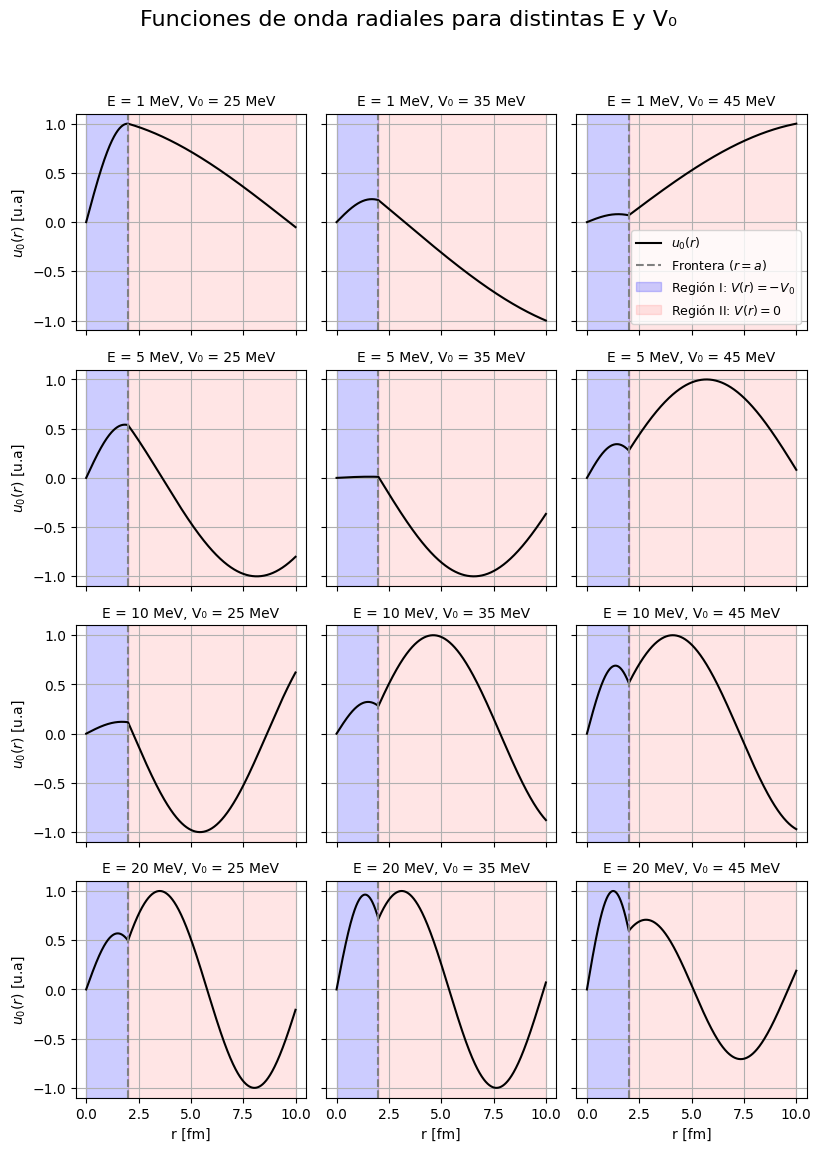

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

hbar2_2mu = 41.47  # Constante hbar² / 2μ
a = 2.0  # radio del pozo en fm

# Listas de energías y profundidades del pozo
energias = [1, 5, 10, 20]         # MeV
potenciales = [25, 35, 45]        # MeV

# Dominio radial
r = np.linspace(0, 10, 1000)

# Gráfica - Subplots
fig, axes = plt.subplots(len(energias), len(potenciales), figsize=(8.27, 11.7), sharex=True, sharey=True)
fig.suptitle("Funciones de onda radiales para distintas E y V₀", fontsize=16)

for i, E in enumerate(energias):
    for j, V0 in enumerate(potenciales):
        ax = axes[i, j]

        # Momentos de onda
        k_out = np.sqrt(E / hbar2_2mu)           # fuera del pozo
        k_in = np.sqrt((E + V0) / hbar2_2mu)     # dentro del pozo

        # Fase de dispersión
        delta = np.arctan((k_out / k_in) * np.tan(k_in * a))

        # Coeficientes A y B
        A = 1.0
        B = A * np.sin(k_in * a) / np.sin(k_out * a + delta)

        # Función de onda
        u = np.piecewise(r,
            [r <= a, r > a],
            [lambda r: A * np.sin(k_in * r),
             lambda r: B * np.sin(k_out * r + delta)]
        )

        # Normalización
        u /= np.max(np.abs(u))

        # Gráfica individual
        ax.plot(r, u, color='black')
        ax.axvline(x=a, color='gray', linestyle='--')
        ax.axvspan(0, a, color='blue', alpha=0.2)
        ax.axvspan(a, r[-1], color='red', alpha=0.1)
        ax.set_title(f"E = {E} MeV, V₀ = {V0} MeV", fontsize=10)
        ax.grid(True)
        if i == len(energias) - 1:
            ax.set_xlabel("r [fm]")
        if j == 0:
            ax.set_ylabel(r"$u_0(r)$ [u.a]")

# Leyenda
handles = [
    plt.Line2D([0], [0], color='black', label=r'$u_0(r)$'),
    plt.Line2D([0], [0], color='gray', linestyle='--', label=r'Frontera ($r = a$)'),
    plt.Rectangle((0, 0), 1, 1, color='blue', alpha=0.2, label='Región I: $V(r) = -V_0$'),
    plt.Rectangle((0, 0), 1, 1, color='red', alpha=0.1, label='Región II: $V(r) = 0$')
]
axes[0, -1].legend(handles=handles, fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#PUNTO 5:
Suponga que el potencial nuclear para un sistema de dos nucleos está dado por el potencial de
Yukawa

V (r) = −V0
e
−αr
r
.

Escoja un par de núcleos, considerándolos como partículas puntuales, y grafique el potencial efectivo
variando V0 y α, para l = 0, l = 2 y l = 4.

2794.48230726


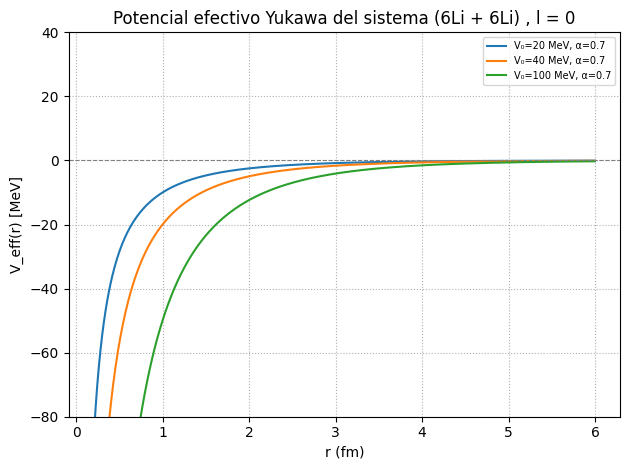

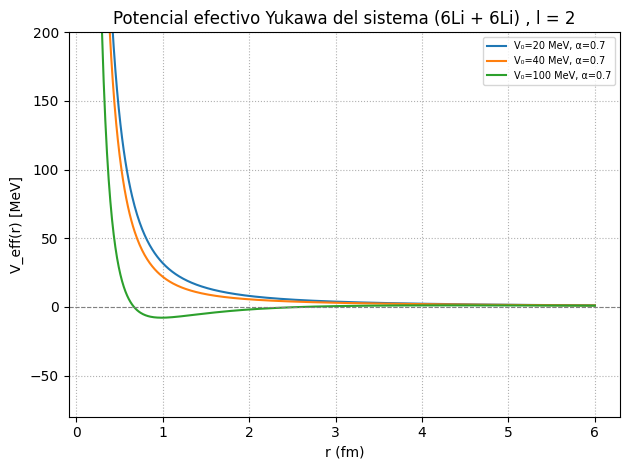

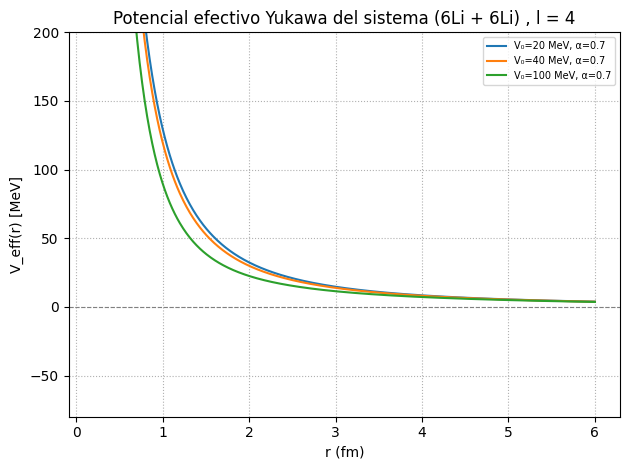

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
hbarc = 197.3269804  # MeV·fm
u = 931.49410242     # MeV/c² (unidad de masa atómica)

# Masa reducida para el sistema Li6 Li6
MLitio = 6 * u  # MeV/c²
mu_li6li6 = MLitio / 2  # simplificacion cuando 1 y 2 son iguales

print(mu_li6li6)

# parte cst del termino centrifugo
const_Li6 = hbarc**2 / (2 * mu_li6li6)

# Rango radial
r = np.linspace(0.2, 6, 600)  # fm

# Parámetros a variar
V0_list = [20, 40, 100]        # MeV
alpha_fijo = 0.7             # fm⁻¹

alpha_list = [0.3, 0.7, 1.5]  # fm⁻¹
V0_fijo = 100            # MeV

# Función para el potencial efectivo
def V_eff(r, V0, alpha, l, const):
    V = -V0 * np.exp(-alpha * r) / r
    V_cent = const * l * (l + 1) / r**2
    return V + V_cent

# Graficar para l = 0, 2, 4
for l in [0, 2, 4]:
    plt.figure()
    # Curvas con V0 variable (ALPHA fijo)              PARA OBTENER LAS GRAFICAS CON Vo fijo
    for V0 in V0_list:                                #descomentar esta parte y comentar la de abajo
        plt.plot(r, V_eff(r, V0, alpha_fijo, l, const_Li6),
                 label=f"V₀={V0} MeV, α={alpha_fijo}")
    # Curvas con alpha variable (V0 fijo)             pARA OBTENER LAS GRAFICAS CON ALPHA fijo
    #for alpha in alpha_list:                          descomentar esta parte y comentar la de arriba
    #   plt.plot(r, V_eff(r, V0_fijo, alpha, l, const_Li6),
    #              label=f"V₀={V0_fijo} MeV, α={alpha}")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.xlabel("r (fm)")
    plt.ylabel("V_eff(r) [MeV]")
    plt.title(f"Potencial efectivo Yukawa del sistema (6Li + 6Li) , l = {l}")
    plt.ylim(-80, 200 if l > 0 else 40)
    plt.legend(fontsize=7)
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

#Punto 6
Grafique la distribución angular elástica en la aproximación de Bohr para el sistema neutrón-protón
interactuando a través de un potencial de Yukawa. Varíe los valores de V0 y α.

Código con unidades y datos reales del sistema n-p

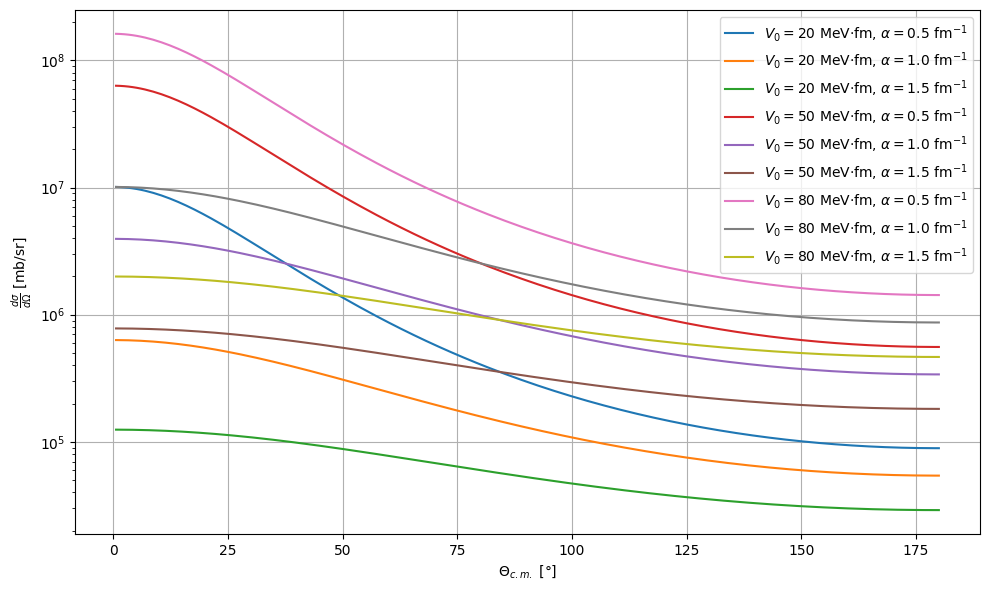

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
hbar_c = 197.327  # MeV·fm
m_p = 938.272     # masa del protón en MeV/c^2
m_n = 939.565     # masa del neutrón en MeV/c^2

# Masa reducida (en MeV/c^2)
mu = (m_p * m_n) / (m_p + m_n)

# Energía constante del neutrón incidente (en MeV, laboratorio)
E_lab = 50
E_cm = E_lab / 2  # energía en el centro de masa

# Ángulos en el sistema del centro de masa
theta = np.linspace(0.01, np.pi, 200)  # en radianes

# Lista de combinaciones (V0, alpha) para analizar
potential_params = [
    (20, 0.5),
    (20, 1.0),
    (20, 1.5),
    (50, 0.5),
    (50, 1.0),
    (50, 1.5),
    (80, 0.5),
    (80, 1.0),
    (80, 1.5),

]

# Función para calcular sección eficaz diferencial (con unidades)
def differential_cross_section(theta, E_cm, V0, alpha):
    k = np.sqrt(2 * mu * E_cm) / hbar_c  # momento en el centro de masa (1/fm)
    q = 2 * k * np.sin(theta / 2)        # momento transferido (1/fm)
    f_theta = 4 * np.pi * V0 / (q**2 + alpha**2)  # amplitud de dispersión (fm)
    return np.abs(f_theta)**2  # sección eficaz diferencial (fm^2/sr)

# Graficamos resultados
fig, ax = plt.subplots(figsize=(10, 6))

for V0, alpha in potential_params:
    dsigma = differential_cross_section(theta, E_cm, V0, alpha)
    dsigma_mb = dsigma * 10  # convertir fm^2/sr a mb/sr
    #ax.plot(np.degrees(theta), dsigma_mb, label=f"$V_0={V0}$ MeV·fm, $\\alpha={alpha}$ 1/fm")
    ax.plot(np.degrees(theta), dsigma_mb, label=f"$V_0={V0}$ MeV·fm, $\\alpha={alpha}\\ \\mathrm{{fm}}^{{-1}}$")



ax.set_xlabel(r"$\Theta_{c.m.}$ [°]")
ax.set_ylabel(r"$\frac{d\sigma}{d\Omega}$ [mb/sr]")
#ax.set_title("Dispersión elástica sistema n–p con potencial de Yukawa\nVariando $V_0$ y $\\alpha$, energía fija")
ax.legend()
ax.set_yscale('log')
ax.grid(True)
plt.tight_layout()
plt.show()


## PUNTO 7

PAR A = 88

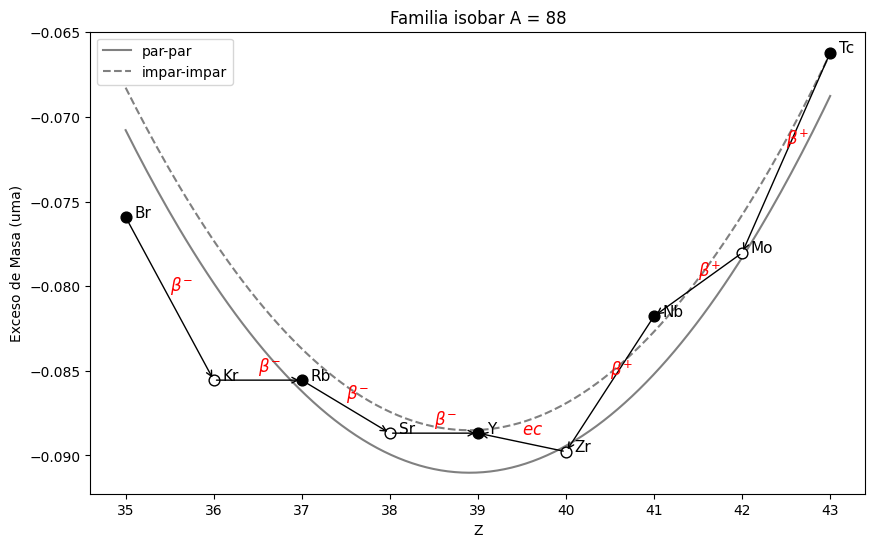

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros en MeV
a_V = 15.753
a_S = 17.804
a_c = 0.7103
a_sym = 23.69
a_p = 33.6

# Masas en MeV
m_n = 939.565  # neutrón
m_p = 938.272  # protón

# Conversión MeV a uma
MeV_to_amu = 1 / 931.494

# Número de nucleones
A = 88

# Rango de Z para las curvas continuas
Z_continuo = np.linspace(35, 43, 200)

# Cálculo de coeficientes que no dependen de Z
alpha = m_n - a_V + (a_S / A**(1/3)) + a_sym
beta = (m_n - m_p) + 4 * a_sym + (a_c / A**(1/3))
gamma = (4 * a_sym / A) + (a_c / A**(1/3))
delta = a_p*A**(-3/4)

# Listas para resultados
mass_excess_parpar = []
mass_excess_imparimpar = []

# Cálculo para las curvas continuas
for Z in Z_continuo:
    pairing_parpar = delta
    M_parpar = alpha * A - beta * Z + gamma * Z**2 - pairing_parpar
    M_amu_parpar = M_parpar * MeV_to_amu
    mass_excess_parpar.append((M_amu_parpar - A)+0.029)

    pairing_imparimpar = -delta
    M_imparimpar = alpha * A - beta * Z + gamma * Z**2 - pairing_imparimpar
    M_amu_imparimpar = M_imparimpar * MeV_to_amu
    mass_excess_imparimpar.append((M_amu_imparimpar - A)+0.029)

# --- Datos experimentales ---
Z_exp = np.array([43, 42, 41, 40, 39, 38, 37, 36, 35])
mass_excess_exp = np.array([
    -0.066205472,
    -0.078032709,
    -0.081771863,
    -0.08977943,
    -0.088684414,
    -0.088684414,
    -0.085552135,
    -0.085552135,
    -0.075917075
])
elementos = ['Tc', 'Mo', 'Nb', 'Zr', 'Y', 'Sr', 'Rb', 'Kr', 'Br']

# Diccionario para acceder a coordenadas por nombre
coordenadas = {elementos[i]: (Z_exp[i], mass_excess_exp[i]) for i in range(len(elementos))}

# --- Gráfica ---
plt.figure(figsize=(10,6))
plt.plot(Z_continuo, mass_excess_parpar, label='par-par', color='grey')
plt.plot(Z_continuo, mass_excess_imparimpar, label='impar-impar', color='grey', linestyle='--')

# Puntos experimentales con distinción de paridad
for i in range(len(Z_exp)):
    Z_i = Z_exp[i]
    N_i = A - Z_i

    if (Z_i % 2 == 0) and (N_i % 2 == 0):  # Par-Par
        plt.scatter(Z_i, mass_excess_exp[i], facecolors='white', edgecolors='black', s=60, zorder=3)
    elif (Z_i % 2 == 1) and (N_i % 2 == 1):  # Impar-Impar
        plt.scatter(Z_i, mass_excess_exp[i], facecolors='black', edgecolors='black', s=60, zorder=3)
    else:  # Par-Impar o Impar-Par, opcional, si quieres los podemos dejar de otro color
        plt.scatter(Z_i, mass_excess_exp[i], facecolors='lightgrey', edgecolors='black', s=60, zorder=3)

    plt.text(Z_i+0.1, mass_excess_exp[i], elementos[i], color='black', fontsize=11)

# Flechas solicitadas con etiquetas
pares_flechas = [
    ('Br', 'Kr', r'$\beta^{-}$'),
    ('Kr', 'Rb', r'$\beta^{-}$'),
    ('Rb','Sr',r'$\beta^{-}$'),
    ('Sr', 'Y', r'$\beta^{-}$'),
    ('Tc', 'Mo', r'$\beta^{+}$'),
    ('Mo', 'Nb', r'$\beta^{+}$'),
    ('Nb', 'Zr', r'$\beta^{+}$'),
    ('Zr', 'Y', r'$ec$')
]

for inicio, fin, texto in pares_flechas:
    x_ini, y_ini = coordenadas[inicio]
    x_fin, y_fin = coordenadas[fin]

    plt.annotate(
        '', xy=(x_fin, y_fin), xytext=(x_ini, y_ini),
        arrowprops=dict(arrowstyle="->", color='black', lw=1)
    )

    # Posición del texto en el punto medio, ligeramente elevado
    x_text = (x_ini + x_fin) / 2
    y_text = (y_ini + y_fin) / 2 + 0.0005
    plt.text(x_text, y_text, texto, fontsize=12, color='red')

plt.xlabel('Z')
plt.ylabel('Exceso de Masa (uma)')
plt.title(f'Familia isobar A = {A}')
plt.grid(False)
plt.legend()
plt.show()

IMPAR A = 83

/tmp/ipython-input-59-907017326.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


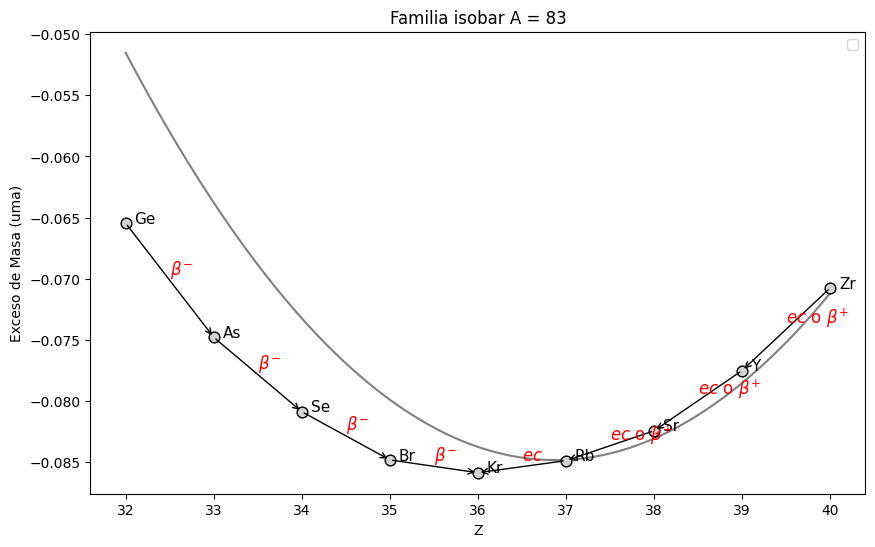

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros en MeV
a_V = 15.753
a_S = 17.804
a_c = 0.7103
a_sym = 23.69
a_p = 33.6

# Masas en MeV
m_n = 939.565  # neutrón
m_p = 938.272  # protón

# Conversión MeV a uma
MeV_to_amu = 1 / 931.494

# Número de nucleones
A = 83

# Rango de Z para las curvas continuas
Z_continuo = np.linspace(32, 40, 200)

# Cálculo de coeficientes que no dependen de Z
alpha = m_n - a_V + (a_S / A**(1/3)) + a_sym
beta = (m_n - m_p) + 4 * a_sym + (a_c / A**(1/3))
gamma = (4 * a_sym / A) + (a_c / A**(1/3))
delta = a_p*A**(-3/4)

# Listas para resultados
mass_excess_parpar = []
mass_excess_imparimpar = []

# Cálculo para las curvas continuas
for Z in Z_continuo:
    pairing_parpar = delta
    M_parpar = alpha * A - beta * Z + gamma * Z**2 - pairing_parpar
    M_amu_parpar = M_parpar * MeV_to_amu
    mass_excess_parpar.append((M_amu_parpar - A)+0.031)

    pairing_imparimpar = -delta
    M_imparimpar = alpha * A - beta * Z + gamma * Z**2 - pairing_imparimpar
    M_amu_imparimpar = M_imparimpar * MeV_to_amu
    mass_excess_imparimpar.append((M_amu_imparimpar - A)+0.031)

# --- Datos experimentales ---
Z_exp = np.array([40, 39, 38, 37, 36, 35, 34, 33, 32])  # Z en orden descendente
mass_excess_exp = np.array([
    -0.070759447,  # Zr
    -0.077516334,  # Y
    -0.082446049,  # Sr
    -0.084885786,  # Rb
    -0.085873492,  # Kr
    -0.084825023,  # Br
    -0.080881895,  # Se
    -0.074793074,  # As
    -0.065460862   # Ge
])
elementos = ['Zr', 'Y', 'Sr', 'Rb', 'Kr', 'Br', 'Se', 'As', 'Ge']


# Diccionario de elemetnos
coordenadas = {elementos[i]: (Z_exp[i], mass_excess_exp[i]) for i in range(len(elementos))}

# --- Gráfica ---
plt.figure(figsize=(10,6))
plt.plot(Z_continuo, mass_excess_parpar, label='', color='grey')
#plt.plot(Z_continuo, mass_excess_imparimpar, label='impar-impar', color='grey', linestyle='--')

# Puntos experimentales con distinción de paridad
for i in range(len(Z_exp)):
    Z_i = Z_exp[i]
    N_i = A - Z_i

    if (Z_i % 2 == 0) and (N_i % 2 == 0):  # Par-Par
        plt.scatter(Z_i, mass_excess_exp[i], facecolors='white', edgecolors='black', s=60, zorder=3)
    elif (Z_i % 2 == 1) and (N_i % 2 == 1):  # Impar-Impar
        plt.scatter(Z_i, mass_excess_exp[i], facecolors='black', edgecolors='black', s=60, zorder=3)
    else:  # Par-Impar o Impar-Par
        plt.scatter(Z_i, mass_excess_exp[i], facecolors='lightgrey', edgecolors='black', s=60, zorder=3)

    plt.text(Z_i+0.1, mass_excess_exp[i], elementos[i], color='black', fontsize=11)

# Flechas
pares_flechas = [
    ('Ge', 'As', r'$\beta^{-}$'),
    ('As', 'Se', r'$\beta^{-}$'),
    ('Se', 'Br', r'$\beta^{-}$'),
    ('Br', 'Kr', r'$\beta^{-}$'),
    ('Rb', 'Kr', r'$ec$'),
    ('Sr', 'Rb', r'$ec$ o $\beta^{+}$'),
    ('Y', 'Sr', r'$ec$ o $\beta^{+}$'),
    ('Zr', 'Y', r'$ec$ o $\beta^{+}$')
]


for inicio, fin, texto in pares_flechas:
    x_ini, y_ini = coordenadas[inicio]
    x_fin, y_fin = coordenadas[fin]

    plt.annotate(
        '', xy=(x_fin, y_fin), xytext=(x_ini, y_ini),
        arrowprops=dict(arrowstyle="->", color='black', lw=1)
    )

    # Posición del texto en el punto medio, ligeramente elevado
    x_text = (x_ini + x_fin) / 2
    y_text = (y_ini + y_fin) / 2 + 0.0005
    plt.text(x_text, y_text, texto, fontsize=12, color='red')

plt.xlabel('Z')
plt.ylabel('Exceso de Masa (uma)')
plt.title(f'Familia isobar A = {A}')
plt.grid(False)
plt.legend()
plt.show()


#Punto 9
Siguiendo las diapositivas encuentre la relación para el momento magnético por nucleón como función
de j (líneas de Schmidt). Grafíquelas y compárelas con datos experimentales.

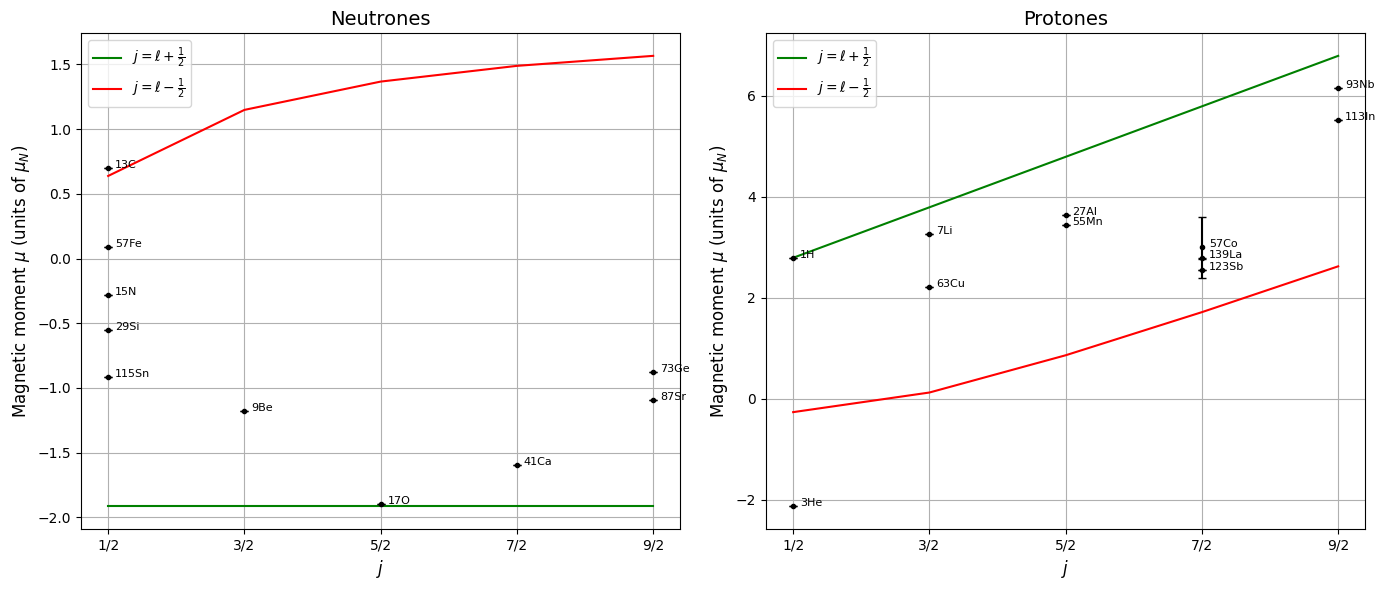

In [ ]:
# Reimportar bibliotecas después del reinicio
import matplotlib.pyplot as plt
from fractions import Fraction
import numpy as np

# Factores g
g_l_p, g_s_p = 1.0, 5.586   # protón
g_l_n, g_s_n = 0.0, -3.826  # neutrón

# Función líneas de Schmidt
def mu_schmidt(j, l, g_l, g_s):
    if np.isclose(j, l + 0.5):
        return g_l * (j - 0.5) + g_s / 2
    elif np.isclose(j, l - 0.5):
        return (j / (j + 1)) * (g_l * (j + 1.5) - g_s / 2)
    else:
        return np.nan

# Función para convertir a string fraccional
def frac_str(x):
    return str(Fraction(x).limit_denominator())

# Datos experimentales extendidos con incertidumbres corregidos
exp_data = [
    # Neutrons: (isótopo, valor, incertidumbre, j, tipo)
    ("9Be", -1.177430, 0.000005, 1.5, 'n'),
    ("13C", 0.702369, 0.000004, 0.5, 'n'),
    ("15N", -0.2830569, 0.0000014, 0.5, 'n'),
    ("17O", -1.893543, 0.000010, 2.5, 'n'),
    ("29Si", -0.555052, 0.000003, 0.5, 'n'),
    ("41Ca", -1.59443, 0.00007, 3.5, 'n'),
    ("57Fe", 0.09020, 0.00004, 0.5, 'n'),
    ("73Ge", -0.87824, 0.00005, 4.5, 'n'),
    ("87Sr", -1.09316, 0.00011, 4.5, 'n'),
    ("93Nb", 6.1531, 0.0005, 4.5, 'p'),  # Destacado
    ("115Sn", -0.9174, 0.0004, 0.5, 'n'),
    ("139La", 2.7791, 0.0002, 3.5, 'p'),  # Destacado

    # Protons
    ("1H", 2.792847351, 0.000000009, 0.5, 'p'),
    ("3He", -2.12762531, 0.00000003, 0.5, 'p'),
    ("7Li", 3.256407, 0.000012, 1.5, 'p'),
    ("27Al", 3.64070, 0.00002, 2.5, 'p'),
    ("55Mn", 3.4467, 0.0016, 2.5, 'p'),
    ("57Co", 3.0, 0.6, 3.5, 'p'),
    ("63Cu", 2.22369, 0.00013, 1.5, 'p'),
    ("113In", 5.5208, 0.0004, 4.5, 'p'),
    ("123Sb", 2.5457, 0.0012, 3.5, 'p')
]

# Crear figura
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Neutrones
j_upper_n, mu_upper_n = [], []
j_lower_n, mu_lower_n = [], []

for l in range(0, 9):  # asegurar j hasta 9/2
    j_plus = l + 0.5
    j_minus = l - 0.5

    if j_plus <= 4.5:
        mu_plus = mu_schmidt(j_plus, l, g_l_n, g_s_n)
        j_upper_n.append(j_plus)
        mu_upper_n.append(mu_plus)

    if l > 0 and j_minus <= 4.5:
        mu_minus = mu_schmidt(j_minus, l, g_l_n, g_s_n)
        j_lower_n.append(j_minus)
        mu_lower_n.append(mu_minus)

ax[0].plot(j_upper_n, mu_upper_n, 'g-', label=r'$j = \ell + \frac{1}{2}$')
ax[0].plot(j_lower_n, mu_lower_n, 'r-', label=r'$j = \ell - \frac{1}{2}$')

for label, mu_exp, mu_err, j_exp, tipo in exp_data:
    if tipo == 'n' and j_exp <= 4.5:
        color = 'red' if label in ['93Nb', '139La'] else 'black'
        ax[0].errorbar(j_exp, mu_exp, yerr=mu_err, fmt='.', color=color, capsize=3)
        ax[0].text(j_exp + 0.05, mu_exp, f"{label}", fontsize=8, color=color)

ax[0].set_title('Neutrones', fontsize=14, color='Black')
ax[0].set_xlabel(r'$j$', fontsize=12)
ax[0].set_ylabel(r'Magnetic moment $\mu$ (units of $\mu_N$)', fontsize=12)
ax[0].grid(True)
ax[0].legend()
ax[0].set_xticks(sorted(set(j_upper_n + j_lower_n)))
ax[0].set_xticklabels([frac_str(j) for j in sorted(set(j_upper_n + j_lower_n))])

# Protones
j_upper_p, mu_upper_p = [], []
j_lower_p, mu_lower_p = [], []

for l in range(0, 9):
    j_plus = l + 0.5
    j_minus = l - 0.5

    if j_plus <= 4.5:
        mu_plus = mu_schmidt(j_plus, l, g_l_p, g_s_p)
        j_upper_p.append(j_plus)
        mu_upper_p.append(mu_plus)

    if l > 0 and j_minus <= 4.5:
        mu_minus = mu_schmidt(j_minus, l, g_l_p, g_s_p)
        j_lower_p.append(j_minus)
        mu_lower_p.append(mu_minus)

ax[1].plot(j_upper_p, mu_upper_p, 'g-', label=r'$j = \ell + \frac{1}{2}$')
ax[1].plot(j_lower_p, mu_lower_p, 'r-', label=r'$j = \ell - \frac{1}{2}$')

for label, mu_exp, mu_err, j_exp, tipo in exp_data:
    if tipo == 'p' and j_exp <= 4.5:
        ax[1].errorbar(j_exp, mu_exp, yerr=mu_err, fmt='k.', capsize=3)
        ax[1].text(j_exp + 0.05, mu_exp, f"{label}", fontsize=8)

ax[1].set_title('Protones', fontsize=14, color='black')
ax[1].set_xlabel(r'$j$', fontsize=12)
ax[1].set_ylabel(r'Magnetic moment $\mu$ (units of $\mu_N$)', fontsize=12)
ax[1].grid(True)
ax[1].legend()
ax[1].set_xticks(sorted(set(j_upper_p + j_lower_p)))
ax[1].set_xticklabels([frac_str(j) for j in sorted(set(j_upper_p + j_lower_p))])

plt.tight_layout()
plt.show()


#Punto 10
Escoja y dibuje tres espectros vibracionales y tres espectros rotacionales nucleares experimentales
¿Qué tanto se alejan de un vibrador/rotor ideal? Derive los momentos de inercia y frecuencias de
oscilación en cada caso.

Vibracionales

In [ ]:
import pandas as pd

# Datos con incertidumbres para los tres núcleos
datos = {
    '90Zr': {'E2': 2186.276, 'dE2': 0.014, 'E4': 3076.925, 'dE4': 0.015},
    '76Se': {'E2': 559.103, 'dE2': 0.005, 'E4': 1330.872, 'dE4': 0.008},
    '30Si': {'E2': 2235.325, 'dE2': 0.024, 'E4': 5279.25, 'dE4': 0.013}
}

# Constante de Planck reducida en MeV·fs
hbar = 6.582119569e-4  # MeV·fs
n = 1  # primer fonón (vibracional)

# Inicializar diccionarios para resultados
resultados = {}

# Cálculos por núcleo
for nucleo, valores in datos.items():
    # Extraer datos
    E2 = valores['E2']
    dE2 = valores['dE2']
    E4 = valores['E4']
    dE4 = valores['dE4']

    # E4/E2 y su incertidumbre (propagación de errores)
    cociente = E4 / E2
    error_cociente = cociente * ((dE2 / E2)**2 + (dE4 / E4)**2)**0.5
    error_porcentual = abs(cociente - 1.8) / 1.8 * 100

    # Frecuencia angular ω y su incertidumbre (E2 en MeV)
    E2_MeV = E2 * 1e-3
    dE2_MeV = dE2 * 1e-3
    omega = E2_MeV / (hbar * (n + 0.5))
    delta_omega = dE2_MeV / (hbar * (n + 0.5))

    # Guardar resultados
    resultados[nucleo] = {
        'E4/E2': cociente,
        'Error': error_cociente,
        'Error porcentual (%)': error_porcentual,
        'ω (fs⁻¹)': omega,
        'Δω (fs⁻¹)': delta_omega
    }

# Crear DataFrame combinado
tabla_combinada = pd.DataFrame(resultados).T

# Aplicar reglas de cifras significativas al redondear los resultados

def redondear(val, err):
    """
    Redondea el valor y su error usando reglas de cifras significativas:
    - El error se expresa con 1 o 2 cifras significativas
    - El valor se redondea al mismo decimal que el error
    """
    from math import log10, floor

    if err == 0:
        return val, err

    # Número de cifras significativas en el error
    orden = floor(log10(err))
    cifras = -orden + 1 if err < 3 * 10**orden else -orden

    err_red = round(err, cifras)
    val_red = round(val, cifras)
    return val_red, err_red

# Aplicar redondeo a cada resultado
tabla_redondeada = pd.DataFrame(columns=tabla_combinada.columns, index=tabla_combinada.index)

for idx, fila in tabla_combinada.iterrows():
    E4_E2, dE4_E2 = redondear(fila['E4/E2'], fila['Error'])
    omega, domega = redondear(fila['ω (fs⁻¹)'], fila['Δω (fs⁻¹)'])
    error_pct = round(fila['Error porcentual (%)'], 2)

    tabla_redondeada.loc[idx] = {
        'E4/E2': E4_E2,
        'Error': dE4_E2,
        'Error porcentual (%)': error_pct,
        'ω (fs⁻¹)': omega,
        'Δω (fs⁻¹)': domega
    }

tabla_redondeada



,E4/E2,Error,Error porcentual (%),ω (fs⁻¹),Δω (fs⁻¹)
90Zr,1.407382,0.000011,21.81,2214.359,0.014
76Se,2.38037,0.000026,32.24,566.285,0.005
30Si,2.361737,0.000026,31.21,2264.038,0.024


Rotacionales

In [ ]:
import pandas as pd

# Datos de los niveles 2+ y 4+ (energía en keV y sus incertidumbres)
datos = {
    '168Er': {'E2': 79.804, 'dE2': 0.001, 'E4': 264.0888, 'dE4': 0.0014},
    '170Yb': {'E2': 84.25468, 'dE2': 0.0009, 'E4': 277.43, 'dE4': 0.04},
    '180Hf': {'E2': 93.3240, 'dE2': 0.0020, 'E4': 308.576, 'dE4': 0.003}
}

# Constante de Planck reducida (MeV·fs)
hbar = 6.582119569e-4

# j = 2 para el cálculo del momento de inercia
j = 2
j_factor = j * (j + 1)  # 2*(2+1) = 6

# Ideal E4/E2 para comparación
ideal_rotor = 10 / 3

# Inicializar diccionario para la tabla final
resultados = {}

for nucleo, vals in datos.items():
    # Valores experimentales
    E2, dE2 = vals['E2'], vals['dE2']
    E4, dE4 = vals['E4'], vals['dE4']

    # E4/E2 y su incertidumbre
    razon = E4 / E2
    delta_razon = razon * ((dE2/E2)**2 + (dE4/E4)**2)**0.5
    error_pct = abs(razon - ideal_rotor) / ideal_rotor * 100

    # Momento de inercia I y su incertidumbre
    E2_MeV = E2 * 1e-3
    dE2_MeV = dE2 * 1e-3
    I = (hbar**2 * j_factor) / (2 * E2_MeV)
    delta_I = I * (dE2_MeV / E2_MeV)

    # Guardar resultados
    resultados[nucleo] = {
        'E4/E2': razon,
        'Δ(E4/E2)': delta_razon,
        'Error porcentual (%)': error_pct,
        'I (MeV·fs²)': I,
        'ΔI (MeV·fs²)': delta_I
    }

# Crear DataFrame final
tabla_completa = pd.DataFrame(resultados).T

import pandas as pd

# Datos de los niveles 2+ y 4+ (energía en keV y sus incertidumbres)
datos = {
    '168Er': {'E2': 79.804, 'dE2': 0.001, 'E4': 264.0888, 'dE4': 0.0014},
    '170Yb': {'E2': 84.25468, 'dE2': 0.0009, 'E4': 277.43, 'dE4': 0.04},
    '180Hf': {'E2': 93.3240, 'dE2': 0.0020, 'E4': 308.576, 'dE4': 0.003}
}

# Constante de Planck reducida (MeV·fs)
hbar = 6.582119569e-4

# j = 2 para el cálculo del momento de inercia
j = 2
j_factor = j * (j + 1)  # 2*(2+1) = 6

# Ideal E4/E2 para comparación
ideal_rotor = 10 / 3

# Inicializar diccionario para la tabla final
resultados = {}

for nucleo, vals in datos.items():
    # Valores experimentales
    E2, dE2 = vals['E2'], vals['dE2']
    E4, dE4 = vals['E4'], vals['dE4']

    # E4/E2 y su incertidumbre
    razon = E4 / E2
    delta_razon = razon * ((dE2/E2)**2 + (dE4/E4)**2)**0.5
    error_pct = abs(razon - ideal_rotor) / ideal_rotor * 100

    # Momento de inercia I y su incertidumbre
    E2_MeV = E2 * 1e-3
    dE2_MeV = dE2 * 1e-3
    I = (hbar**2 * j_factor) / (2 * E2_MeV)
    delta_I = I * (dE2_MeV / E2_MeV)

    # Guardar resultados
    resultados[nucleo] = {
        'E4/E2': razon,
        'Δ(E4/E2)': delta_razon,
        'Error porcentual (%)': error_pct,
        'I (MeV·fs²)': I,
        'ΔI (MeV·fs²)': delta_I
    }

# Crear DataFrame final
tabla_completa = pd.DataFrame(resultados).T
print(tabla_completa)



          E4/E2  Δ(E4/E2)  Error porcentual (%)  I (MeV·fs²)  ΔI (MeV·fs²)
168Er  3.309218  0.000045              0.723473     0.000016  2.040814e-10
170Yb  3.292755  0.000476              1.217357     0.000015  1.647810e-10
180Hf  3.306502  0.000078              0.804938     0.000014  2.984668e-10
